In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

workdir = "/home/corea/src/MDG_ML/MEYDG-51K"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]

dataset = np.load(workdir + "//MEYDG51K_dataset.npz") # input file
ss0 = np.load(workdir + '//MEYDG51K_dataset_r2.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

2 94


In [6]:
x.shape

(51951, 62718)

In [7]:
training_image_array.shape

(46756, 62718)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(46756, 62718) (46756,) (5195, 62718) (5195,)


In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (46756, 62718)
46756 train samples
5195 test samples


In [11]:
# https://towardsdatascience.com/how-to-perform-ridge-and-ridge-regression-in-python-3b3b75541ad8
# https://brunch.co.kr/@itschloe1/11
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(random_state = 42)
# Train the model on training data
rf.fit(train_X, training_label_array)
EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2022-02-11 08:21:46.483460
EndTime : 2022-02-11 11:27:52.504668


In [12]:
import matplotlib
from matplotlib import pyplot as plt

In [13]:
predicted_classes = rf.predict(test_X)

In [14]:
predicted_value = predicted_classes

In [15]:
import pickle
import joblib
workdir = "/home/corea/src/MDG_ML/result_Rev/MEYDG-51K/RF"
joblib.dump(rf, workdir + '/MEYDG51K_r2_RF_model.pkl') 


['/home/corea/src/MDG_ML/result_Rev/MEYDG-51K/RF//MEYDG51K_r2_RF_model.pkl']

In [16]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [17]:
c.to_csv(workdir + '/MEYDG51K_r2_RF_pred_obs_table.csv')

In [18]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.8178827016719978, intercept=0.37451732442638264, rvalue=0.8922524990722199, pvalue=0.0, stderr=0.005743640316838163)

In [19]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7954288035547926


In [20]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.260216905348414


/home/corea/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


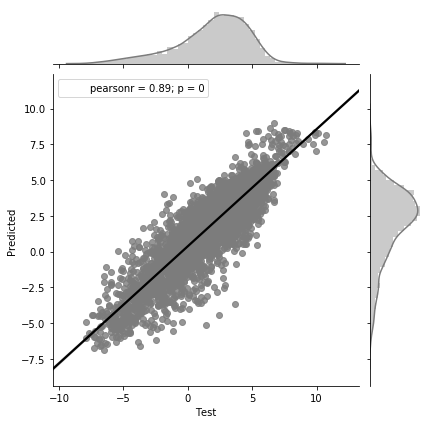

In [21]:
workdir = "/home/corea/src/MDG_ML/result_Rev/MEYDG-51K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '/MEYDG51K_r2_RF.png', dpi=300)